In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt
import seaborn as sns

# Veriyi yükleme
df = pd.read_csv('C:/Users/alper/OneDrive/Masaüstü/ab_test_data - ab_test_data.csv.csv')

# Tarih formatını düzeltme
df['timestamp'] = pd.to_datetime(df['timestamp'])

# 1. Temel İstatistikler
summary = df.groupby('test_group')['conversion'].agg(['count', 'sum', 'mean'])
summary.columns = ['Kullanıcı Sayısı', 'Dönüşüm Sayısı', 'Dönüşüm Oranı']

# Tarih bilgileri
start_date = df['timestamp'].min()
end_date = df['timestamp'].max()
duration = (end_date - start_date).days

summary_dict = summary.to_dict()
dates_info = {
    "Başlangıç": start_date,
    "Bitiş": end_date,
    "Süre (Gün)": duration
}

print("Özet Tablo:")
print(summary)
print("\nTarih Bilgileri:")
print(dates_info)

Özet Tablo:
            Kullanıcı Sayısı  Dönüşüm Sayısı  Dönüşüm Oranı
test_group                                                 
a                      10013             611       0.061021
b                       9985             889       0.089034

Tarih Bilgileri:
{'Başlangıç': Timestamp('2023-07-03 01:42:34'), 'Bitiş': Timestamp('2023-07-25 01:41:19'), 'Süre (Gün)': 21}


In [3]:
# Grup A ve B için başarı (conversion) ve gözlem (count) sayıları
successes = [summary.loc['a', 'Dönüşüm Sayısı'], summary.loc['b', 'Dönüşüm Sayısı']]
nobs = [summary.loc['a', 'Kullanıcı Sayısı'], summary.loc['b', 'Kullanıcı Sayısı']]

# Z-testi
z_stat, p_value = proportions_ztest(successes, nobs)

print(f"Z-istatistiği: {z_stat:.4f}")
print(f"P-değeri: {p_value}")

Z-istatistiği: -7.5197
P-değeri: 5.491217728445103e-14


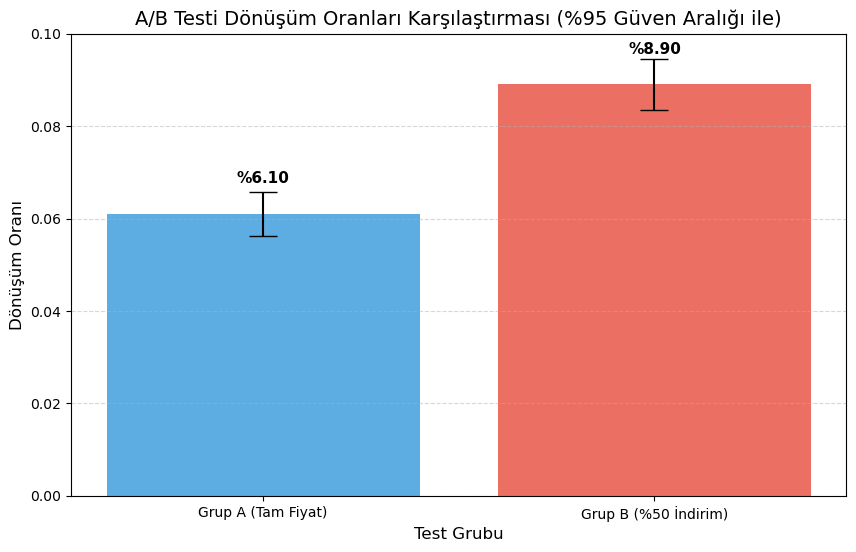

In [16]:
# Görselleştirme
plt.figure(figsize=(10, 6))

# %95 Güven Aralığı hesaplaması (Standart Hata * 1.96)
# SE = sqrt(p * (1-p) / n)
summary['std_error'] = np.sqrt(summary['Dönüşüm Oranı'] * (1 - summary['Dönüşüm Oranı']) / summary['Kullanıcı Sayısı'])
summary['conf_interval'] = summary['std_error'] * 1.96

# Grafik Çizimi
bars = plt.bar(summary.index, summary['Dönüşüm Oranı'], yerr=summary['conf_interval'], 
        capsize=10, color=['#3498db', '#e74c3c'], alpha=0.8)

plt.title('A/B Testi Dönüşüm Oranları Karşılaştırması (%95 Güven Aralığı ile)', fontsize=14)
plt.ylabel('Dönüşüm Oranı', fontsize=12)
plt.xlabel('Test Grubu', fontsize=12)
plt.xticks([0, 1], ['Grup A (Tam Fiyat)', 'Grup B (%50 İndirim)'])
plt.ylim(0, 0.10) # Y eksenini biraz genişletelim ki rahat görünsün

# Barların üzerine oranları yazdırma
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.006, f"%{yval*100:.2f}", ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()